Salma Azmi Rasyidah/ M-05

In [ ]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

**A. Data Understanding**

Pertama, kita download dulu dataset dengan kode berikut.

In [ ]:
!kaggle datasets download -d shubhammehta21/movie-lens-small-latest-dataset

  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 99.7MB/s]


Jika berhasil, file movie-lens-small-latest-dataset.zip akan masuk ke sistem storage Google Colab. Kemudian, lakukan unzip file dengan menerapkan kode berikut.

In [ ]:
!unzip /content/movie-lens-small-latest-dataset.zip

Archive:  /content/movie-lens-small-latest-dataset.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


1. Data Loading 

Selanjutnya, kita baca data-data di atas dengan menggunakan fungsi pandas.read_csv.

In [ ]:
import pandas as pd
 
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
ratings = ratings.drop(columns='timestamp')
 
print('Jumlah data film : ', len(movies.movieId.unique()))
print('Jumlah data penilaian dari users : ', len(ratings.userId.unique()))

Jumlah data film :  9742
Jumlah data penilaian dari users :  610


2. Univariate Exploratory Data Analysis

Kita eksplorasi variabel-variabel yang ada pada dataset.

a. Movie variable

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Berdasarkan output di atas, kita dapat mengetahui bahwa **Movies.csv**, adalah file yang berisi informasi tentang film yang ada pada dataset. varibael yang terdapat pada file ini diantaranya movieId, title, dan genres. Dengan penjelasan masing-masing variabel sebagai berikut :

 - movieId : Id dari film 
 - title : Judul film
 - genres : Genre film

Selanjutnya kita lihat banyak data film serta jenis dari judul dan aliran. 

In [ ]:
print('Banyak data film: ', len(movies.movieId.unique()))
print('Jenis judul film : ', movies.title.unique())
print('Jenis aliran film : ', movies.genres.unique())

Banyak data film:  9742
Jenis judul film :  ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Flint (2017)' 'Bungo Stray Dogs: Dead Apple (2018)'
 'Andrew Dice Clay: Dice Rules (1991)']
Jenis aliran film :  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Actio

b. Ratings Variabel 

Selanjutnya kita eksplorasi file ratings.

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


**Ratings.csv**, adalah file yang berisi informasi tentang penilaian yang diberikan oleh pengguna. varibael yang terdapat pada file ini diantaranya movieId, userId, dan rating. Dengan penjelasan masing-masing variabel sebagai berikut :
 - movieId : Id dari film 
 - userId : Id dari pengguna
 - rating : Penilaian dari pengguna

 Selanjutnya kita akan mengetahui abnyak data user, penilaian, dan data film. 

In [ ]:
print('Banyak data user: ', len(ratings.userId.unique()))
print('Banyak penilaian : ', len(ratings.rating.unique()))
print('Banyak data film : ', len(ratings.movieId.unique()))

Banyak data user:  610
Banyak penilaian :  10
Banyak data film :  9724


Didapat informasi bahwa :
Banyak data user:  610
Banyak penilaian :  10
Banyak data film :  9724

Kita lihat terlebih dahulu berapa jumlah kolom dan baris pada variabel ratings. 


In [ ]:
print(ratings.shape)

(100836, 3)


Selanjutnya, mari kita eksplorasi data yang akan kita gunakan pada model yaitu data rating. Pertama, kita lihat seperti apa data pada variabel rating dengan fungsi head()

In [ ]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


Kita dapat bahwa terdapat variabel userId, movieId, dan rating pada ratings. 

Nah, untuk melihat distribusi rating pada data, gunakan fungsi describe().

In [ ]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


Dari output di atas, diketahui bahwa nilai maksimum rating adalah 5 dan nilai minimumnya adalah 0.5. Artinya, skala rating berkisar antara 0.5 hingga 5. 

Selanjutnya, mari kita hitung jumlah rating dan userId berdasarkan movieId

In [ ]:
ratings.groupby('movieId').sum()

,userId,rating
movieId,,
1,65904,843.0
2,36251,377.5
3,14747,169.5
4,1539,16.5
5,14679,150.5
...,...,...
193581,184,4.0
193583,184,3.5
193585,184,3.5


Lalu kita cek apakah ada missing value pada dataset.

In [ ]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

Karena tidak terdapat missing value kita bisa lanjut ke tahap berikutnya.

3. Data Preprocessing

Pertama, definisikan variabel all_movie_rate dengan variabel rating yang telah kita ketahui sebelumnya.



In [ ]:
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Lalu kita gabungkan 'all_movie_rate' dengan dataframe yang berisi data dari file movies.csv.

In [87]:
all_movie = pd.merge(all_movie_rate, movies[['movieId','title','genres']], how='left')
 

all_movie

,userId,movieId,rating,user,movie,title,genres
0,1,1,4.0,0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,0,1,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,0,2,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,0,3,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,0,4,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...
100831,610,166534,4.0,609,3120,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,609,2035,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,609,3121,Get Out (2017),Horror
100834,610,168252,5.0,609,1392,Logan (2017),Action|Sci-Fi


B. Data Preparation

1. Mengatasi missing value

Lalu kita cek kembali apakah terdapat missing value pada dataframe yang baru saja kita buat. 

In [ ]:
all_movie.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

Karena tidak ada maka kita lanjut ke tahap berikutnya.

2. Menyamakan ID film 

Menyamakan ID film. 
Pertama, mari kita cek ulang data setelah proses cleaning pada tahap sebelumnya. Kita buat variabel baru bernama fix_movie untuk menyimpan dataframe.


In [ ]:
fix_movies = all_movie.sort_values('movieId', ascending=True)
fix_movies

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81531,517,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30517,213,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81082,514,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30601,214,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
27256,184,193581,4.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,Flint (2017),Drama
27259,184,193587,3.5,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Sekarang, kita memiliki 100836 baris data. Lalu mengecek berapa jumlah film yang mencakup data tersebut.

In [ ]:
len(fix_movies.movieId.unique())

9724

Selanjutnya, mari kita cek genre film yang unik 

In [ ]:
fix_movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

Berikutnya, kita bisa melanjutkan ke tahap persiapan. Membuat variabel bernama preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId.

In [ ]:
preparation = fix_movies
preparation.sort_values('movieId')

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
89904,584,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
58096,381,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
89316,580,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
61120,399,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
27256,184,193581,4.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,Flint (2017),Drama
27259,184,193587,3.5,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Selanjutnya, kita hanya akan menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, kita perlu menghapus data yang duplikat dengan fungsi drop_duplicates(). Dalam hal ini, kita membuang data duplikat pada kolom ‘movieId’.

In [ ]:
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
42115,288,2,2.0,Jumanji (1995),Adventure|Children|Fantasy
43169,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance
38179,262,4,1.0,Waiting to Exhale (1995),Comedy|Drama|Romance
77224,483,5,2.5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
27256,184,193581,4.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,Flint (2017),Drama
27259,184,193587,3.5,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


3. Konversi Data Series Menjadi List

Selanjutnya, kita perlu melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi tolist() dari library numpy.

In [ ]:
movie_id = preparation['movieId'].tolist()
 

movie_title = preparation['title'].tolist()
 

movie_genres = preparation['genres'].tolist()
 
print(len(movie_id))
print(len(movie_title))
print(len(movie_genres))

9724
9724
9724


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data movie_id, movie_title, dan movie_genres yang telah kita siapkan sebelumnya.

In [ ]:
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genres': movie_genres
})
movie_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,Flint (2017),Drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


C. Modelling

a. Model Development - Content Based Filtering

Kini, saatnya Anda mengembangkan sistem rekomendasi dengan pendekatan content based filtering. Tapi sebelumnya, mari cek lagi data yang kita miliki dan assign dataframe dari tahap sebelumnya ke dalam variabel data

In [ ]:
data = movie_new
data.sample(5)

,id,title,genres
7207,73321,"Book of Eli, The (2010)",Action|Adventure|Drama
5962,36477,"Baxter, The (2005)",Comedy|Drama|Romance
6970,67087,"I Love You, Man (2009)",Comedy
5642,27537,Nothing (2003),Comedy|Fantasy|Mystery|Sci-Fi
6309,48698,Deliver Us from Evil (2006),Documentary


*   TF-IDF Vectorizer

Membangun sistem rekomendasi sederhana berdasarkan genre film. Teknik TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap genre film. Pada proyek ini, kita juga menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(data['genres']) 
 

tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks. 

In [ ]:
tfidf_matrix = tf.fit_transform(data['genres']) 

tfidf_matrix.shape 

(9724, 24)

Matriks yang kita miliki berukuran (9724, 24). Nilai 9724 merupakan ukuran data dan 24 merupakan matrik kategori masakan.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense().

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.41681721, 0.51634045, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51235785, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57836121, 0.        , 0.8157808 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa film dan genrenya.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,horror,sci,film,fi,adventure,drama,animation,romance,western,thriller,...,listed,imax,action,noir,musical,fantasy,children,crime,no,documentary
title,,,,,,,,,,,,,,,,,,,,,
Save the Last Dance (2001),0.000000,0.000000,0.0,0.000000,0.000000,0.540394,0.000000,0.841412,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
"Last Legion, The (2007)",0.000000,0.000000,0.0,0.000000,0.444757,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.390606,0.0,0.0,0.515427,0.000000,0.000000,0.0,0.0
Tooth Fairy (2010),0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.874804,0.000000,0.000000,0.0,0.0
Happy Go Lovely (1951),0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0
Killer Movie (2008),0.547163,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.437825,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
Rise of the Footsoldier (2007),0.000000,0.000000,0.0,0.000000,0.000000,0.403822,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.597710,0.0,0.0,0.000000,0.000000,0.692583,0.0,0.0
Sleeper (1973),0.000000,0.652169,0.0,0.652169,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
Ever After: A Cinderella Story (1998),0.000000,0.000000,0.0,0.000000,0.000000,0.466539,0.000000,0.726418,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
The Nut Job 2: Nutty by Nature (2017),0.000000,0.000000,0.0,0.000000,0.476039,0.000000,0.589703,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.576446,0.000000,0.0,0.0


Output matriks tf-idf di atas menunjukkan Film Happy Go Lovely (1951) memiliki kategori musical. Begitu juga dengan yang lainnya.


*   Cosine Similarity

Selanjutnya, kita akan menghitung derajat kesamaan (similarity degree) antar film dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn. 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.81352752, 0.15262722, ..., 0.        , 0.42122062,
        0.26751731],
       [0.81352752, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57053212],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42122062, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26751731, 0.        , 0.57053212, ..., 0.        , 0.        ,
        1.        ]])

Pada tahapan ini, kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita telah berhasil menghitung kesamaan (similarity) antar film. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array. 

Selanjutnya, mari kita lihat matriks kesamaan setiap film dengan menampilkan nama restoran dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). 

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9724, 9724)


title,Amy (2015),Body Double (1984),Mozart and the Whale (2005),Experimenter (2015),I'm Still Here (2010)
title,,,,,
Click (2006),0.0,0.00000,0.639070,0.298151,0.439203
Puppet Master III: Toulon's Revenge (1991),0.0,0.23803,0.000000,0.000000,0.000000
Fellini's Casanova (Il Casanova di Federico Fellini) (1976),0.0,0.00000,0.863332,0.540394,0.366844
"Song of Bernadette, The (1943)",0.0,0.00000,0.466539,1.000000,0.678847
Much Ado About Nothing (1993),0.0,0.00000,0.884500,0.000000,0.418930
Battle for the Planet of the Apes (1973),0.0,0.00000,0.000000,0.000000,0.000000
Encino Man (1992),0.0,0.00000,0.504636,0.000000,0.734280
"Giver, The (2014)",0.0,0.00000,0.168526,0.361225,0.245217
Turtles Can Fly (Lakposhtha hâm parvaz mikonand) (2004),0.0,0.00000,0.182807,0.391837,0.265997


Dengan cosine similarity, kita berhasil mengidentifikasi kesamaan antara satu film dengan film lainnya. Shape (9724, 9724) merupakan ukuran matriks similarity dari data yang kita miliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 9724 film x 9724 film (masing-masing dalam sumbu X dan Y). Artinya, kita mengidentifikasi tingkat kesamaan pada 9724 nama film.



*   Mendapatkan Rekomendasi


Selanjutnya, kita membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

- Nama_film : Nama film (index kemiripan dataframe).
- Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_name’ dan ‘genres’.
- k : Banyak rekomendasi yang ingin diberikan.

Sistem rekomendasi menyatakan bahwa keluaran sistem ini adalah berupa top-N recommendation. Oleh karena itu, kita akan memberikan sejumlah rekomendasi film pada pengguna yang diatur dalam parameter k. 


In [ ]:
def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=5):
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
 
    closest = closest.drop(nama_film, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, mari kita terapkan kode di atas untuk menemukan rekomendasi film yang mirip dengan Father of the Bride Part II (1995).

In [ ]:
data[data.title.eq('Father of the Bride Part II (1995)')]

,id,title,genres
4,5,Father of the Bride Part II (1995),Comedy


Father of the Bride Part II (1995) masuk dalam kategori genre comedy. Tentu kita berharap rekomendasi yang diberikan adalah film dengan kategori yang mirip. 

In [ ]:
movie_recommendations('Father of the Bride Part II (1995)')

,title,genres
0,Andrew Dice Clay: Dice Rules (1991),Comedy
1,Caddyshack (1980),Comedy
2,Shakes the Clown (1992),Comedy
3,Human Traffic (1999),Comedy
4,Whipped (2000),Comedy


Dapat dilihat dari hasil diatas sistem kita memberikan rekomendasi 5 judul film bergenre comedy. 

b. Model Development - Collaborative Filtering

* Data Understanding 

Pertama, jangan lupa import semua library yang dibutuhkan. 

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Untuk memudahkan supaya tidak tertukar dengan fitur ‘rating’ pada data, kita ubah nama variabel rating menjadi df.

In [ ]:
df = ratings
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


* Data Preparation

Pada tahap ini, melakukan persiapan data untuk menyandikan (encode) fitur ‘user’ dan ‘movieId’ ke dalam indeks integer

In [ ]:
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya, lakukan hal yang sama pada fitur ‘movieId’.

In [ ]:
movie_ids = df['movieId'].unique().tolist()
 

movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 

movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

Berikutnya, petakan userId dan movieId ke dataframe yang berkaitan.

In [ ]:
df['user'] = df['userId'].map(user_to_user_encoded)
 

df['movie'] = df['movieId'].map(movie_to_movie_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah film, dan mengubah nilai rating menjadi float.

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 

num_movie = len(movie_to_movie_encoded)
print(num_movie)
 

df['rating'] = df['rating'].values.astype(np.float32)
 

min_rating = min(df['rating'])

max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


Tahap persiapan telah selesai. 

* Membagi Data untuk Training dan Validasi 

Acak datanya terlebih dahulu agar distribusinya menjadi random.

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


Selanjutnya, kita bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, kita perlu memetakan (mapping) data user dan film menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [ ]:
x = df[['user', 'movie']].values
 

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],    
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


* Proses Training

Di sini, kita membuat class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings resto
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_movie + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

Langkah berikutnya, mulailah proses training. 

In [86]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10084/10084 [==============================] - 95s 9ms/step - loss: 0.6267 - root_mean_squared_error: 0.2223 - val_loss: 0.6126 - val_root_mean_squared_error: 0.2060
Epoch 2/100
10084/10084 [==============================] - 94s 9ms/step - loss: 0.6050 - root_mean_squared_error: 0.1986 - val_loss: 0.6085 - val_root_mean_squared_error: 0.2014
Epoch 3/100
10084/10084 [==============================] - 92s 9ms/step - loss: 0.6002 - root_mean_squared_error: 0.1931 - val_loss: 0.6074 - val_root_mean_squared_error: 0.1998
Epoch 4/100
10084/10084 [==============================] - 96s 10ms/step - loss: 0.5973 - root_mean_squared_error: 0.1896 - val_loss: 0.6066 - val_root_mean_squared_error: 0.1988
Epoch 5/100
10084/10084 [==============================] - 91s 9ms/step - loss: 0.5958 - root_mean_squared_error: 0.1878 - val_loss: 0.6069 - val_root_mean_squared_error: 0.1990
Epoch 6/100
10084/10084 [==============================] - 90s 9ms/step - loss: 0.5947 - root_mean_squared_er

*Visualisasi Metrik

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib.

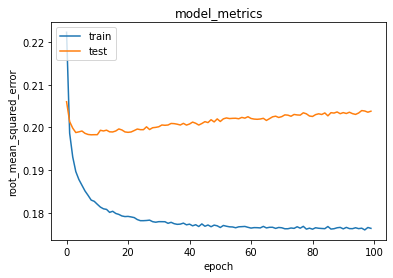

In [88]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.1763 dan error pada data validasi sebesar 0.2038. Nilai tersebut cukup bagus untuk sistem rekomendasi.

* Mendapatkan rekomendasi film

Sebelumnya, pengguna telah memberi rating pada beberapa film yang telah mereka tonton. Kita menggunakan rating ini untuk membuat rekomendasi film yang mungkin cocok untuk pengguna. Nah, film yang akan direkomendasikan tentulah film yang belum pernah tonton oleh pengguna. Oleh karena itu, kita perlu membuat variabel resto_not_visited sebagai daftar film untuk direkomendasikan pada pengguna. 

Variabel movie_not_visited diperoleh dengan menggunakan operator bitwise (~) pada variabel movie_visited_by_user.

In [92]:
movie_df = movie_new
df = pd.read_csv('ratings.csv')
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['id'].isin(movie_visited_by_user.movieId.values)]['id'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

Selanjutnya, untuk memperoleh rekomendasi film, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [96]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

Showing recommendations for users: 464
Movie with high ratings from user
--------------------------------
Star Wars: Episode VI - Return of the Jedi (1983) : Action|Adventure|Sci-Fi
Hunt for Red October, The (1990) : Action|Adventure|Thriller
L.A. Confidential (1997) : Crime|Film-Noir|Mystery|Thriller
Game, The (1997) : Drama|Mystery|Thriller
Lord of the Rings: The Fellowship of the Ring, The (2001) : Adventure|Fantasy
--------------------------------
Top 10 movie recommendation
--------------------------------
Heidi Fleiss: Hollywood Madam (1995) : Documentary
Paths of Glory (1957) : Drama|War
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) : Comedy
Stunt Man, The (1980) : Action|Adventure|Comedy|Drama|Romance|Thriller
Belle époque (1992) : Comedy|Romance
Trial, The (Procès, Le) (1962) : Drama
Adam's Rib (1949) : Comedy|Romance
Enter the Void (2009) : Drama
Bill Hicks: Revelations (1993) : Comedy
Band of Brothers (2001) : Action|Drama|War


Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 464. Dari output tersebut, kita dapat membandingkan antara film with high ratings from user dan Top 10 film recommendation untuk user. 

Perhatikanlah, beberapa memiliki genre yang sesuai dengan rating user. Dan rekomendasi 10 film diantaranya :
- Heidi Fleiss: Hollywood Madam (1995) : Documentary
- Paths of Glory (1957) : Drama|War
- Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) : Comedy
- Stunt Man, The (1980) : Action|Adventure|Comedy|Drama|Romance|Thriller
- Belle époque (1992) : Comedy|Romance
- Trial, The (Procès, Le) (1962) : Drama
- Adam's Rib (1949) : Comedy|Romance
- Enter the Void (2009) : Drama
- Bill Hicks: Revelations (1993) : Comedy
- Band of Brothers (2001) : Action|Drama|War